# Lab Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the Lab assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

**Read** in the `creditcard.csv` dataset and **display** the first 5 rows.


In [2]:
# Question 1 code here
cc=pd.read_csv('creditcard.csv')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then **split the data** into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
# Question 2 code here.
X=cc.drop('Class',axis='columns').values
y=cc.Class.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5,random_state=0)


## Question 3: /5 pts 

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words:

1. **Does `LogisticRegression` use a penalty by default?**  If yes, **what penalty?**

  *YOUR ANSWER HERE*: Yes, The default penalty LogisitcRegression is l2.
  
    
2. If we apply a penalty during learning, **what difference do you expect to see in the resulting coefficients**, relative to not applying a penalty during learning?

  *YOUR ANSWER HERE:* The coefficients will not overfit the data as much since the point of the penalty is to reduce overfitting.
    
    
3. If using the **default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix?** Briefly **explain why or why not.**

  *YOUR ANSWER HERE:* No since the column of 1s are included within the matrix.
 

## Question 4: /15 pts

* **Create** a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  Use `max_iter=10000` which seems to supress the warning.


* Using this object, **run a logisitic regression analysis of `Class` (y-variable) against `Amount` (x-variable) using your training data.** 


* Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

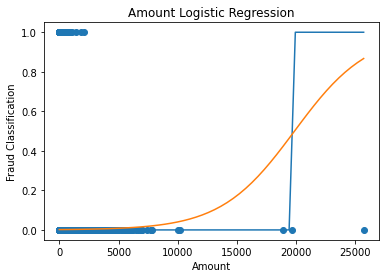

In [4]:
# Question 4 code here
CCLR=LogisticRegression(penalty='none',max_iter=10000)
cclr=CCLR.fit([[v[-1]]for v in Xtrain],ytrain)

amt=[[v[-1]] for v in Xtest]
amtLin=np.reshape(np.linspace(0,max(amt),50),(-1,1))

plt.scatter(amt,ytest)
plt.xlabel('Amount')
plt.ylabel('Fraud Classification')
plt.title('Amount Logistic Regression')
sns.lineplot(x=amtLin[:,0],y=cclr.predict(amtLin))
sns.lineplot(x=amtLin[:,0],y=cclr.predict_proba(amtLin)[:,1])

## Question 5: 15 pts

* **Compute the label-based criteria** we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. 


* **Answer the questions** in this text box below:

    **1. How many of the test instances are labeled positive by your classifier?**

    *YOUR ANSWER HERE:* Only 1 test instance are labeled positive.

    **2. Choose one of the positively-labeled test instances, and explain why the classifier labeled    it positive.**

    *YOUR ANSWER HERE:* The reason why that instance was labeled positive is due to the amount value for that instance being incrediblely large.

    **3. Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.**

    *YOUR ANSWER HERE:*No, since it detect no true positive and instead detected 244 false results.


In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
compute_performance(((cclr.predict(amt)>0.5).astype(int)),ytest,cclr.classes_)

## Put code here to compute whatever else you might need to answer the question.



tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0


## Question 6: /10 pts
* Now **fit a logistic regression model to the training data** and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. 


* **Answer the following question?**
   According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

   *YOUR ANSWER HERE:* Smaller amounts are strongly associated with fraud.


In [6]:
# Code for Question 6
LR=LogisticRegression(penalty='none', max_iter=10000)
alllr=LR.fit(Xtrain,ytrain)
alllr.coef_


array([[-5.98250374e-05,  4.54054884e-01, -3.87623351e-01,
        -1.17675570e+00,  1.19803390e-01, -2.01365942e-01,
        -4.79245189e-02,  9.11985547e-01, -4.94356916e-01,
        -5.94163280e-01, -4.95528895e-01, -6.30704845e-01,
         1.03717945e-01, -4.79236476e-01, -8.04839032e-01,
        -9.78809879e-01, -4.55495910e-01, -4.86843862e-01,
         1.64033031e-01, -2.75136955e-02,  2.48220898e-01,
         6.54323054e-01,  6.56687695e-01,  7.06184223e-02,
        -5.74627300e-02, -8.49796582e-01,  1.93299637e-01,
        -1.28604921e-01,  1.21862188e-01, -6.37616338e-03]])

## Question 7: /15 pts

In the cell below:
* Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 


* Answer the questions in this text box below.

  **1. How many of the test instances are labeled positive by your classifier?**

   *YOUR ANSWER:*183

  **2. Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

   *YOUR ANSWER:* The new classifier is a lot better at detecting fraud. The accuracy, recall, precision and sensitivity are significantly better than the one for amount.


In [7]:
# Code for Question 7
pred1c = alllr.predict(Xtest)
compute_performance((pred1c>0.5).astype(int), ytest, alllr.classes_)


tp: 154 tn: 142132 fp: 29 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.842 Sensitivity: 0.634 Specificity: 1.0


# Question 8: /15 pts

* Plot **ROC curves** for **both of your classifiers** using the cells below. 


* Then answer the following questions, computing whatever quantities you need to answer them.

  **1. Which classifier** has a higher estimated probability of correctly distinguishing between a positive and a negative instance? **How do you know?**

   *YOUR ANSWER:* The all classifiers will have higher probablity of a positive/negative instance since the ROC curve is above y=x meaning it is able to predict more accurately than random. Also the performance on precision for the all classifiers is a lot better than amount classifier.

 **2. How could you explain** a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

   *YOUR ANSWER:* That's because the amount classifier is prediciting more false positives than true positives for the entire training sets.


Text(0.5, 1.0, 'Amount ROC Classifier')

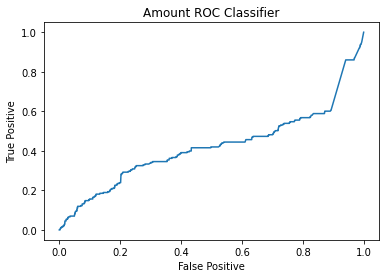

In [8]:
# ROC for Amount-only classifier
amProba=cclr.predict_proba(amt)[:,1]
fp_amount,tp_amount,_=roc_curve(ytest,amProba)
ax=sns.lineplot(x=fp_amount,y=tp_amount)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Amount ROC Classifier')


Text(0.5, 1.0, 'All ROC Classifier')

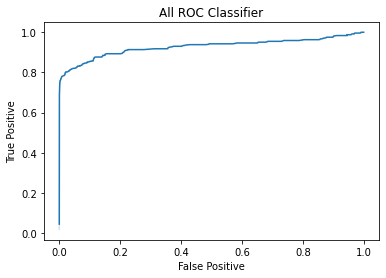

In [9]:
# ROC for all-variable classifier
allProba=alllr.predict_proba(Xtest)[:,1]
fp_all,tp_all,_=roc_curve(ytest,allProba)
ax=sns.lineplot(x=fp_all,y=tp_all)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('All ROC Classifier')

# Question 9: /15 pts

**1. Plot precision-recall curves for both of your classifiers** using the cell below. Be sure to **label your axes**.


**2. Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?**

   *YOUR ANSWER:* The classifier that takes all of the covariates into account.


Text(0.5, 1.0, 'Precision Recall curve for amount')

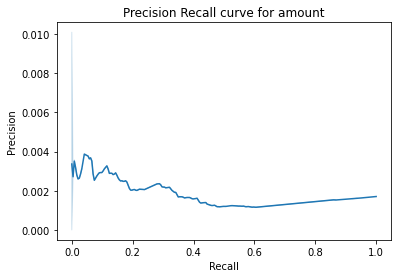

In [10]:
# PRC for Amount-only classifier
pre, recall,_=precision_recall_curve(ytest,cclr.predict_proba(amt)[:,1])
ax=sns.lineplot(x=recall,y=pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for amount')

Text(0.5, 1.0, 'Precision Recall curve for all')

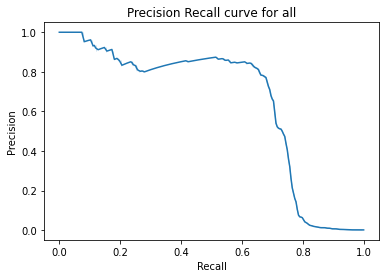

In [11]:
# PRC for all-variable classifier
pre, recall,_=precision_recall_curve(ytest,alllr.predict_proba(Xtest)[:,1])
ax=sns.lineplot(x=recall,y=pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for all')